# <center> Projeto 01 - Unidade II </center>

Seja o sistema dinâmico dado pela seguinte função não linear:

$$ 
y[n] = f\left(y[n - 1],\, y[n - 2],\, u[n],\, u[n - 1]\right)
$$

cujo conjunto entrada / saídas é apresentado na tabela *dados.txt*. Implemente um identificador via **Método dos Mínimos Quadrados** e a **combinação linear de funções de base radial - RBF**. 

No projeto utilize:
* 500 amostras para o treinamento
* 500 amostras para o teste e,
* 500 amostras para validar o modelo.

Compare os resultados obtidos utilizando como métricas o **Erro Médio Quadrático** e o **Coeficiente de Correlação de Pearson** (ver Lab 04). Apresente conclusões.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
from numpy.linalg import pinv

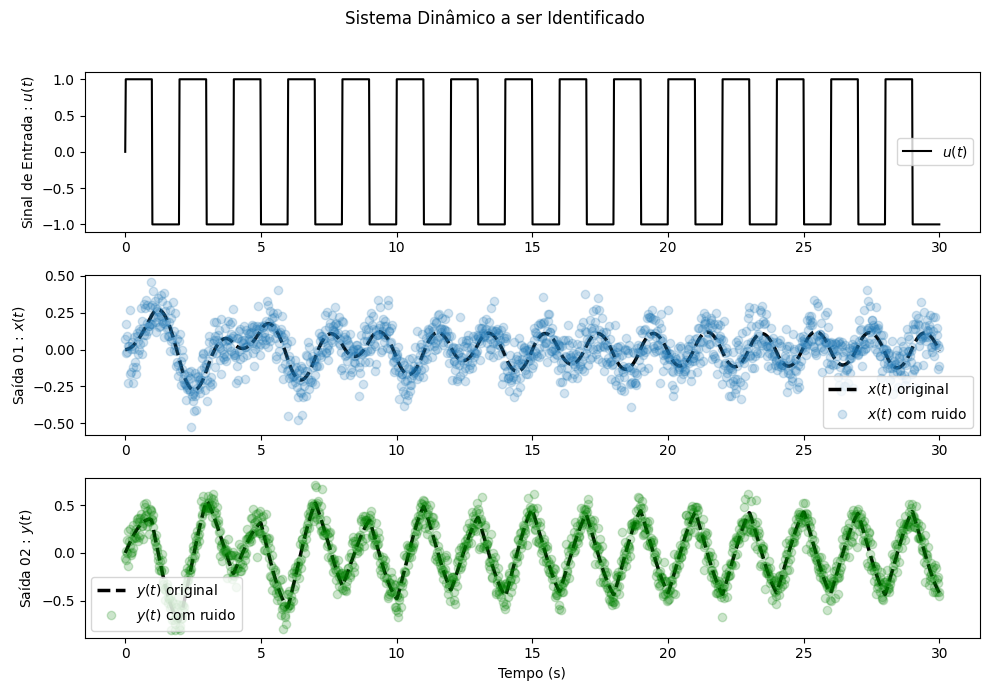

In [4]:
data = np.loadtxt('dados.txt', delimiter=',', skiprows=1)

t = data[:, 0]
u = data[:, 1]
x = data[:, 2]
y = data[:, 3]
x1 = data[:, 4]
y1 = data[:, 5]

# Plot results of simulation
plt.figure(figsize=(10, 7))
plt.subplot(3, 1, 1)
plt.plot(t, u, label='$u(t)$', color='k')
plt.ylabel('Sinal de Entrada : $u(t)$')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, x1, '--k', lw = 2.5, label='$x(t)$ original')
plt.plot(t, x, 'o', alpha = 0.2, label='$x(t)$ com ruido')
plt.ylabel('Saída 01 : $x(t)$')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, y1, '--k', lw = 2.5, label='$y(t)$ original')
plt.plot(t, y, 'og', alpha=0.2, label='$y(t)$ com ruido')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída 02 : $y(t)$')
plt.legend()

plt.suptitle('Sistema Dinâmico a ser Identificado')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

(1498,)
(1498,)
(1498,)
(1498,)


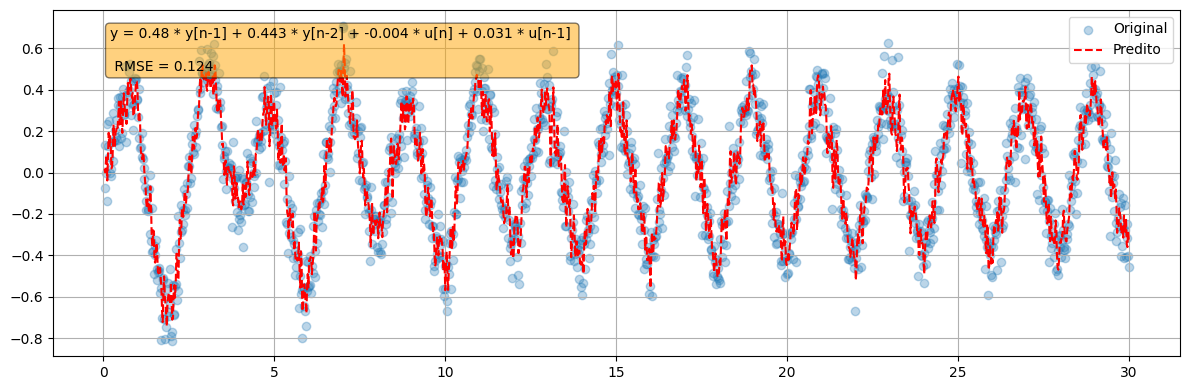

In [ ]:
#Ajustando para y
# y[n] = w0 * y[n-1] + w1 * y[n-2] + w2 * u[n] + w3 * u[n-1]
#MMQ --> w1 = la.pinv(phi_y1) @ y
#RBF --> w1 com fiuncoes RBF

#Numero de dados para treinar
n = 500

t = data[2:, 0] #tempo
u = data[2:, 1] #u[n-1]
U1 = data[1:-1, 1] 

y = data[2:, 3] #saida
Y1 = data[1:-1, 3] #y[n-1]
Y2 = data[:-2, 3] #y[n-2]

print(Y1.shape)
print(Y2.shape)
print(u.shape)
print(U1.shape)

X = np.column_stack((Y1, Y2, u, U1))

#MMQ
w = (la.inv(X.T@X))@X.T@y
y_pred = X@w

rmse = np.sqrt(np.mean((y_pred - y) ** 2))

modelo = (f"y = {w[0]:.2f} * y[n-1] + {w[1]:.3f} * y[n-2] + {w[2]:.3f} * u[n] + "
            f"{w[3]:.3f} * u[n-1] \n\n RMSE = {rmse:.3f}")

plt.figure(figsize=(12,4))
plt.scatter(t, y, alpha = 0.3, label = "Original")
plt.plot(t, y_pred,'--r', label = "Predito")
plt.grid()
plt.legend()
plt.gca().text(0.05, 0.95, modelo, transform=plt.gca().transAxes,
               fontsize=10, verticalalignment='top', 
               bbox=dict(boxstyle='round', facecolor='orange', alpha=0.5))

plt.tight_layout()
plt.show()


(1498,)
(1498,)
(1498,)
(1498,)


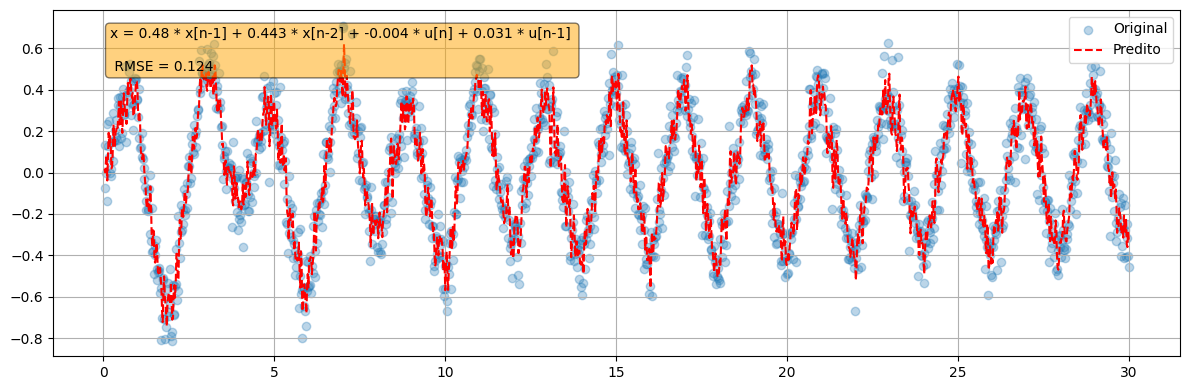

In [ ]:
#Ajustando para x
# x[n] = w0 * x[n-1] + w1 * x[n-2] + w2 * u[n] + w3 * u[n-1]
#MMQ --> w1 = la.pinv(phi_y1) @ y
#RBF --> w1 com fiuncoes RBF

#Numero de dados para treinar
n = 500

t = data[2:, 0] #tempo
u = data[2:, 1] #u[n-1]
U1 = data[1:-1, 1] 

x = data[2:, 3] #saida
X1 = data[1:-1, 3] #y[n-1]
X2 = data[:-2, 3] #y[n-2]

print(X1.shape)
print(X2.shape)
print(u.shape)
print(U1.shape)

X = np.column_stack((X1, X2, u, U1))

#MMQ
w = (la.inv(X.T@X))@X.T@y
x_pred = X@w

rmse = np.sqrt(np.mean((y_pred - y) ** 2))

modelo = (f"x = {w[0]:.2f} * x[n-1] + {w[1]:.3f} * x[n-2] + {w[2]:.3f} * u[n] + "
            f"{w[3]:.3f} * u[n-1] \n\n RMSE = {rmse:.3f}")

plt.figure(figsize=(12,4))
plt.scatter(t, x, alpha = 0.3, label = "Original")
plt.plot(t, x_pred,'--r', label = "Predito")
plt.grid()
plt.legend()
plt.gca().text(0.05, 0.95, modelo, transform=plt.gca().transAxes,
               fontsize=10, verticalalignment='top', 
               bbox=dict(boxstyle='round', facecolor='orange', alpha=0.5))

plt.tight_layout()
plt.show()
